<a href="https://colab.research.google.com/github/farahh001/AI_Assignments/blob/main/AI_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports section
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Train the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt



## Part 1. Loading the dataset

In [ ]:
# Using pandas load the dataset (load remotely, not locally)
life_on_Mars  = "https://raw.githubusercontent.com/profmcnich/example_notebook/main/science_data_large.csv"
df = pd.read_csv(life_on_Mars)




In [ ]:
# Output the first 15 rows of the data
df.head(15)


,Temperature °C,Mols KCL,Size nm^3
0,469,647,6.244743e+05
1,403,694,5.779610e+05
2,302,975,6.196847e+05
3,779,916,1.460449e+06
4,901,18,4.325726e+04
5,545,637,7.124634e+05
6,660,519,7.006960e+05
7,143,869,2.718260e+05
8,89,461,8.919803e+04
9,294,776,4.770210e+05


In [ ]:
# Display a summary of the table information (number of datapoints, etc.)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature °C  1000 non-null   int64  
 1   Mols KCL        1000 non-null   int64  
 2   Size nm^3       1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [ ]:
#Here I get some statistical information. 
df.describe()

,Temperature °C,Mols KCL,Size nm^3
count,1000.000000,1000.000000,1.000000e+03
mean,500.500000,471.530000,5.086111e+05
std,288.819436,288.482872,4.474838e+05
min,1.000000,1.000000,1.611429e+01
25%,250.750000,226.750000,1.298267e+05
50%,500.500000,459.500000,3.827182e+05
75%,750.250000,710.250000,7.603211e+05
max,1000.000000,1000.000000,1.972127e+06


## Part 2. Splitting the dataset

In the experiment, the first two features KCL and temperatures are independent variables and size of slime is the dependent variable.

In [ ]:
### Take the pandas dataset and split it into our features (X) and label (y)

#  the following will select the first two columns except the last column
X = df.iloc[:, :-1].values


# here we are selecting the last column which is our dependent feature.
y = df.iloc[:,-1].values

In [ ]:
X

array([[469, 647],
       [403, 694],
       [302, 975],
       ...,
       [791, 213],
       [769, 553],
       [919, 452]])

In [ ]:
y

array([6.24474257e+05, 5.77961029e+05, 6.19684714e+05, 1.46044903e+06,
       4.32572571e+04, 7.12463400e+05, 7.00696029e+05, 2.71826029e+05,
       8.91980286e+04, 4.77021029e+05, 2.44177114e+05, 5.00645457e+05,
       3.14520000e+04, 5.39021457e+05, 9.18527143e+04, 3.95288286e+04,
       5.38421457e+05, 1.14843143e+04, 1.48585029e+05, 4.16308457e+05,
       1.31596457e+05, 4.82433257e+05, 1.16136540e+06, 1.36031143e+04,
       4.24489114e+05, 1.97787143e+04, 8.03035857e+05, 3.21295000e+05,
       6.95233029e+05, 2.23961400e+05, 1.10432926e+06, 1.92627283e+06,
       5.21373600e+05, 7.91715314e+05, 4.53954314e+05, 5.11930286e+04,
       5.94753143e+04, 4.40629714e+05, 4.60782857e+05, 7.88616000e+04,
       8.03208600e+05, 2.28364457e+05, 2.41597829e+05, 1.04578046e+06,
       6.59932571e+04, 6.18540286e+04, 3.97636457e+05, 4.93009714e+05,
       1.18457029e+05, 2.42666829e+05, 1.26718971e+06, 1.28496257e+05,
       6.10293600e+05, 5.76091143e+04, 9.13729029e+05, 1.41796260e+06,
      

In [ ]:
### Use sklearn to split the features and labels into a training/test set. (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)
print ('The Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

The Training Set: 900 rows
Test Set: 100 rows


AttributeError: ignored

In [ ]:
print(X_train)




[[ 18  61]
 [826 386]
 [518 772]
 ...
 [153 801]
 [726 744]
 [493 979]]


In [ ]:
print(y_train)


[2.51831429e+03 6.51841029e+05 8.23036114e+05 1.07736803e+06
 2.06993829e+05 8.23168314e+05 2.21129114e+05 1.66058286e+04
 1.48401400e+05 7.30240029e+05 6.35764571e+04 4.71719400e+05
 5.86383429e+05 7.03160114e+05 9.35724286e+04 1.86264314e+05
 9.66332571e+04 1.24874203e+06 1.17433029e+05 2.85719400e+05
 9.25831429e+03 3.18040000e+04 7.42452257e+05 3.47416457e+05
 5.05611429e+03 5.77260314e+05 2.16979114e+05 8.80350429e+05
 7.38879429e+05 9.02100600e+05 4.76394429e+05 1.99823400e+05
 4.22777829e+05 2.31532457e+05 3.77713029e+05 7.07185714e+05
 9.65613829e+05 8.91980286e+04 7.00945714e+03 8.38108314e+05
 3.30255457e+05 2.92210029e+05 1.77937829e+05 2.70368000e+05
 3.16844114e+05 4.11841143e+04 2.51269829e+05 1.53178286e+04
 9.13729029e+05 4.53954314e+05 9.97619314e+05 1.10432926e+06
 6.33191143e+04 4.69778400e+05 1.05181543e+06 9.08938286e+04
 3.16833400e+05 6.23115314e+05 6.00674857e+05 3.17104114e+05
 4.70399314e+05 7.97577257e+05 6.02291457e+05 2.19952457e+05
 4.73076600e+05 1.865442

In [ ]:
print(X_test)

[[311 265]
 [951 145]
 [985 786]
 [ 66 317]
 [ 59 277]
 [286 535]
 [230 665]
 [876 601]
 [ 69 347]
 [140 329]
 [480 819]
 [917 836]
 [798 609]
 [157 145]
 [156 451]
 [965 721]
 [310 793]
 [861 216]
 [566  75]
 [663 295]
 [950 993]
 [226 120]
 [978 111]
 [940 984]
 [390 511]
 [895 784]
 [ 75 379]
 [640 255]
 [627 279]
 [403 694]
 [410 511]
 [ 98 521]
 [979 987]
 [629 562]
 [936 986]
 [447 721]
 [674 756]
 [824 800]
 [878 894]
 [677   5]
 [ 79 401]
 [327 982]
 [ 82 421]
 [356 497]
 [341 375]
 [732 156]
 [612 109]
 [423 820]
 [506  75]
 [996  52]
 [758 647]
 [ 45 197]
 [655 886]
 [585 649]
 [869  72]
 [862 491]
 [716 945]
 [665 245]
 [276 720]
 [990 737]
 [982 690]
 [192  29]
 [136  89]
 [476 866]
 [ 33 137]
 [717 887]
 [483 108]
 [579 758]
 [196 722]
 [ 30 113]
 [105 768]
 [961 206]
 [799 665]
 [832 195]
 [544  70]
 [623 732]
 [595 518]
 [838 676]
 [844 207]
 [102 710]
 [654 925]
 [786 471]
 [641 284]
 [347 274]
 [187 575]
 [ 55 257]
 [766 485]
 [881 439]
 [801 473]
 [526  25]
 [112 374]

In [ ]:
print(y_test)

[ 170568.4286    287802.7143   1577891.314      45507.11429
   35586.25714   317629.8571    321295.       1073784.029
   52154.25714    96892.6       811164.6      1564196.457
  992136.6        48014.71429   148395.4571   1417962.6
  513347.1143    383617.0286     91852.71429   401612.4286
 1926272.829      57363.42857   229204.0286   1888864.457
  410720.6      1431661.6        61854.02857   335937.8571
  359614.0286    577961.0286    431400.6       111047.4571
 1972127.4       723568.1143   1884801.029     664790.6
 1043505.6      1346573.714    1603235.314      14894.71429
   68900.31429   673704.1143     75092.02857   365193.4
  263859.8571    237863.3143    141099.4571    718007.4286
   82132.71429   115613.2571   1001908.257      19378.82857
 1190948.457     778384.3143    135712.1143    863716.0286
 1387347.        335545.        415563.4286   1486659.114
 1380546.857      13464.02857    26066.31429   851571.3143
    9974.257143 1303041.114     110457.2571    901128.1143
  30026

## Part 3. Perform a Linear Regression

I will create a model to predict the change in sizes of the slime based off of  Potassium Chloride (KCL) and Temperatures.

In [ ]:
### Use sklearn to train a model on the training set

reg_model = LinearRegression()
# train the model on training data
reg_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Here we grab the intercepts
print(reg_model.intercept_)

-400305.9133335322


In [ ]:
# Here I am trying to relate each feature of the dataset 
reg_model.coef_

array([ 863.58108791, 1006.12741921])

,coef
Temp,863.581088
KCL,1006.127419


If we consider the first feature which is Temp, the increase in size is 863.581. 

In [ ]:
### Report on the score for that model, in your own words (markdown, not code) explain what the score means

### Extract the coefficents and intercept from the model and write an equation for your h(x) using LaTeX

In [ ]:
# Create a sample datapoint and predict the output of that sample with the trained model

Sample = [[345,765]]
linear_model.predict(Sample)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([667317.03769316])

In [ ]:
# Create a sample datapoint and predict the output of that sample with the trained model

Sample = [[345,765]]
reg_model.predict(Sample)

array([667317.03769316])

In [ ]:
#Since my independent features are in numpy array format, 
# I converted it to pandas dataframe to access the columns and find the coefficients for the feautures
df2 = pd.DataFrame(X, columns = ['Temp','KCL'])
coef_df = pd.DataFrame(reg_model.coef_,df2.columns,columns=["coef"])
coef_df

,coef
Temp,863.581088
KCL,1006.127419


In [ ]:
reg_model.intercept_

-400305.9133335322

In [ ]:
#Here is the predicted size of the slime 
pred = reg_model.predict(X_test)
pred

array([ 134891.57109752,  566848.1770532 , 1241137.60975794,
        -24367.1696409 ,  -70657.3340248 ,  384956.44708746,
        467392.47066236,  960873.69862144,    8407.39619923,
         51611.35989487,  838231.36519831, 1232720.46674085,
        901563.3931183 , -118835.20674597,  188176.20244545,
       1158467.7057509 ,  665263.26735435,  560560.92590561,
        163940.53886357,  469055.93661764, 1419180.64745835,
        -84401.29716064,  555956.53417346, 1401489.68980634,
        450621.8221688 , 1161403.05700777,   45784.96014151,
        408948.47482721,  421868.97874553,  645969.69402768,
        467893.44392697,  208517.41869172, 1438187.73449241,
        708330.20055877, 1400047.62029314,  711132.70221441,
        942380.06884206, 1116186.8384737 , 1257396.19462681,
        189369.12027644,   71374.08771584,  870102.22808014,
         94087.37936384,  407174.28131093,  271473.01984826,
        388791.32041263,  237873.60116061,  790013.37060675,
        112125.67358907,

In [ ]:
#here is the actual size of the slime
y_test

array([ 170568.4286  ,  287802.7143  , 1577891.314   ,   45507.11429 ,
         35586.25714 ,  317629.8571  ,  321295.      , 1073784.029   ,
         52154.25714 ,   96892.6     ,  811164.6     , 1564196.457   ,
        992136.6     ,   48014.71429 ,  148395.4571  , 1417962.6     ,
        513347.1143  ,  383617.0286  ,   91852.71429 ,  401612.4286  ,
       1926272.829   ,   57363.42857 ,  229204.0286  , 1888864.457   ,
        410720.6     , 1431661.6     ,   61854.02857 ,  335937.8571  ,
        359614.0286  ,  577961.0286  ,  431400.6     ,  111047.4571  ,
       1972127.4     ,  723568.1143  , 1884801.029   ,  664790.6     ,
       1043505.6     , 1346573.714   , 1603235.314   ,   14894.71429 ,
         68900.31429 ,  673704.1143  ,   75092.02857 ,  365193.4     ,
        263859.8571  ,  237863.3143  ,  141099.4571  ,  718007.4286  ,
         82132.71429 ,  115613.2571  , 1001908.257   ,   19378.82857 ,
       1190948.457   ,  778384.3143  ,  135712.1143  ,  863716.0286  ,
      

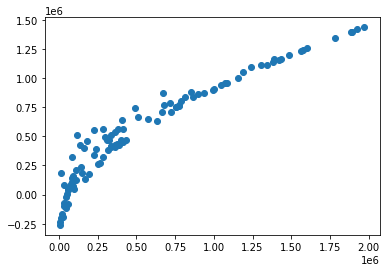

In [ ]:
#Here just to check how far off it is from the actual(prediction tests)
plt.scatter (y_test,pred)

In [ ]:
#here's the Score of the model 
reg_model.score(X_test,y_test)

0.8761646752736477

## Part 4. Use Cross Validation

In [ ]:
# Use the cross_val_score function to repeat your experiment across many shuffles of the data

scores = cross_val_score(reg_model, X, y, cv=6)
print ("Cross-validated scores:", scores)

# Report on their finding and their significance

Cross-validated scores: [0.84218925 0.86742607 0.87093863 0.8604674  0.84826261 0.86031557]


## Part 5. Using Polynomial Regression

In [ ]:
# Using the PolynomialFeatures library perform another regression on an augmented dataset of degree 2
poly_f = PolynomialFeatures(degree=2)
X_train_poly = poly_f.fit_transform(X)
  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y)
  
# Report on the metrics and output the resultant equation as you did in Part 3.

LinearRegression()

In [ ]:
y_predic = poly_model.predict(poly_f.fit_transform(X_test))
y_predic

array([ 170568.42856566,  287802.71428226, 1577891.31429041,
         45507.114277  ,   35586.25713585,  317629.85713351,
        321294.99999546, 1073784.02856338,   52154.25713313,
         96892.59999123,  811164.60000886, 1564196.45715321,
        992136.59999286,   48014.71428772,  148395.45713199,
       1417962.59999901,  513347.11429117,  383617.02856474,
         91852.71429261,  401612.42856311, 1926272.82860233,
         57363.42857561,  229204.02857014, 1888864.45717243,
        410720.59999046, 1431661.60000507,   61854.02856091,
        335937.85713636,  359614.02856397,  577961.02856959,
        431400.59999049,  111047.45713212, 1972127.40002986,
        723568.11427734, 1884801.02860131,  664790.60000021,
       1043505.60000324, 1346573.71429269, 1603235.31430309,
         14894.71429882,   68900.31427481,  673704.1143133 ,
         75092.02856028,  365193.39999018,  263859.85713337,
        237863.31428429,  141099.45714628,  718007.42858014,
         82132.71429306,